# Customer Segmentation using K-Means

## 🧩 Problem Statement
Mall management wants to understand customer spending habits in order to create targeted marketing strategies. This project aims to segment customers into distinct groups based on age, gender, income, and spending score.

## 🎯 Objective
Use unsupervised learning (K-Means) to cluster customers, visualize the groups using PCA, and derive actionable marketing insights from the clusters.


####  Step 1: Import Required Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


#### Step 2: Load Dataset

In [5]:
df = pd.read_csv('../data/Mall_Customers.csv')  # Load customer dataset
print(df.shape)
print(df.head())

(200, 5)
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Insights:
- Dataset includes 200 customer records.

- Features: CustomerID, Gender, Age, Annual Income, Spending Score.

#### Step 3: Data Cleaning

In [6]:

print(df.isnull().sum())  # Check for missing values
df_cleaned = df.drop("CustomerID", axis=1)  # Drop irrelevant column
print(df_cleaned.shape)
print(df_cleaned.head())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
(200, 4)
    Genre  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


- No missing values in any column.

- CustomerID column dropped as it's not relevant for clustering.

#### Step 4: Data Preprocessing

In [7]:

# Convert Gender to numeric: Male=0, Female=1
df_cleaned['Genre'] = df_cleaned['Genre'].map({'Male': 0, 'Female': 1})

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)

- Gender converted to numeric (Male = 0, Female = 1).

- All features standardized using StandardScaler to normalize scales.

#### Step 5: Exploratory Data Analysis

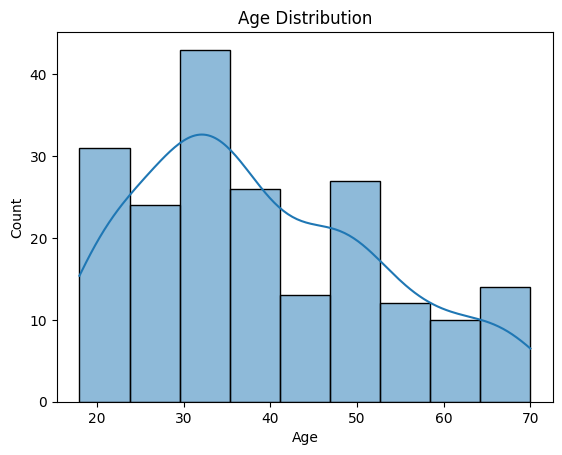

In [8]:

sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()



**Insights:**
- Majority of mall customers are aged 20 to 40.

- This shows that young and mid-age are possibly active shoppers.

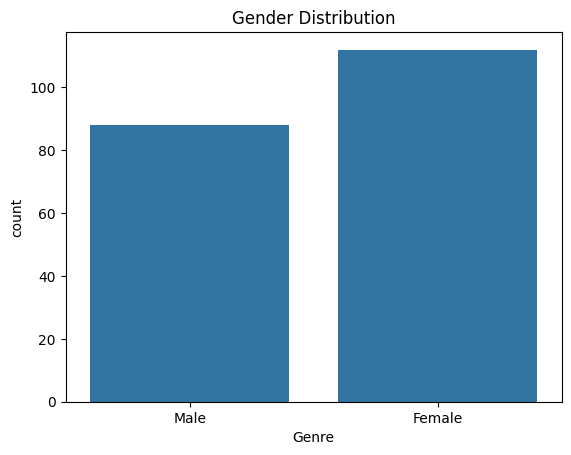

In [9]:
sns.countplot(x='Genre', data=df)
plt.title('Gender Distribution')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()


**Insights:**
- Slight skew towards female customers.

- Marketing strategies could be tailored with a female-oriented focus.

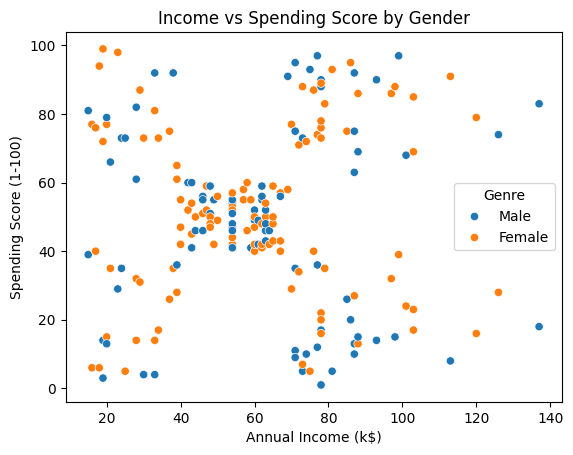

In [10]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre')
plt.title('Income vs Spending Score by Gender')
plt.show()

**Insights:**
- People with the same income spend very differently.

- Some low earners spend a lot, and some high earners spend very little.

- This tells us that spending habits don't depend only on income, so grouping customers makes sense.

####  Step 6: Optimal Cluster Selection (Elbow Method)

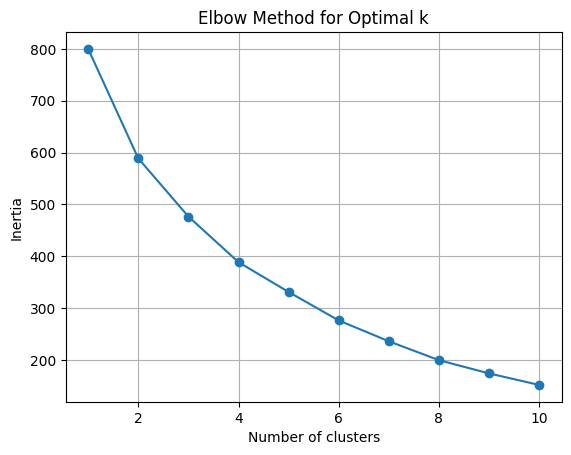

In [11]:

inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


**Insights:**
- As the number of clusters increases, inertia (within-cluster variance) decreases.

- A sharp drop in inertia is observed up to k = 5.

- After k = 5, the rate of decrease slows, forming an "elbow" shape in the curve.

- This suggests that 5 clusters provide a good trade-off between performance and simplicity.

- Choosing more than 5 clusters leads to minimal gain in compactness while increasing complexity.

**Optimal number of clusters selected: k = 5**

#### Step 7: Model Training - Apply K-Means Clustering

In [12]:

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)
df_cleaned['Cluster'] = clusters

**Insights:**
- K-Means was applied with 5 clusters (based on the elbow method).

- Each customer was assigned to a cluster based on their spending patterns.

- A new column **Cluster** was added to label each customer group.

- This helps in understanding and analyzing different customer types.


#### Step 8: Evaluate Clusters with PCA Visualization

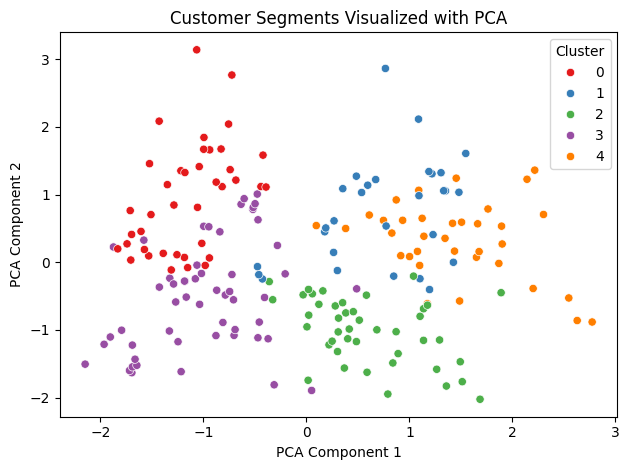

In [13]:

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
df_cleaned['PCA1'] = pca_result[:, 0]
df_cleaned['PCA2'] = pca_result[:, 1]

sns.scatterplot(data=df_cleaned, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title('Customer Segments Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


**Insights:**
- K-Means was applied with 5 clusters (based on the elbow method).

- Each customer was assigned to a cluster based on their spending patterns.

- A new column **Cluster** was added to label each customer group.

- This helps in understanding and analyzing different customer types.


**Insights:**

- The scatter plot clearly shows 5 distinct customer groups.

- Each cluster is shown in a different color on the PCA plot.

- Each dot represents one customer, placed based on their behavior (like age & spending or gender & spending).

- PCA helped reduce the data to 2 main features for easy visualization.

- Customers in the same cluster have similar spending habits.

- Some clusters are tightly packed (very similar customers), while others are more spread out (more variety).

 These clusters can be used to design targeted marketing strategies for each customer group.



#### Step 9: Analyze and Profile Each Cluster

In [14]:

cluster_profiles = df_cleaned.groupby('Cluster').mean().round(2)
print("Cluster Profiles:\n", cluster_profiles)


Cluster Profiles:
          Genre    Age  Annual Income (k$)  Spending Score (1-100)  PCA1  PCA2
Cluster                                                                      
0         0.54  32.69               86.54                   82.13 -1.15  0.96
1         0.55  36.48               89.52                   18.00  0.74  0.74
2         1.00  49.81               49.23                   40.07  0.61 -1.01
3         0.59  24.91               39.72                   61.20 -0.99 -0.50
4         0.00  55.71               53.69                   36.77  1.46  0.33


**Insights:**
- Cluster 0: Young (33), high income(86k), very high spender (82), Slightly more female → great for premium offers & lifestyle promotions.

- Cluster 1: Middle-aged (36), high income (89k$), very low spender (18), Slightly more female → hard to convince, try value-based ads or cashback                   schemes.

- Cluster 2: Older (50), average income (49k$), low spender (40), all female → cautious buyers, may respond to practical offers.

- Cluster 3: Very young (25), low income (40k$), high spender (61), mostly female → impulse buyers, best for trendy or seasonal deals.

- Cluster 4: Older (56), average income (54k$), low spender (36), all male → prefer saving, respond to clear savings or loyalty programs.

###  Step 10: Marketing Strategy Suggestions
| Cluster       | Profile                                                            | Suggested Strategy                                                                              |
| ------------- | ------------------------------------------------------------------ | ----------------------------------------------------------------------------------------------- |
| **Cluster 0** | Young, high income, **very high spending**, mostly **female**      |  Show them new arrivals, premium brands, loyalty rewards, and early access to sales. |
| **Cluster 1** | Middle-aged, high income, **very low spending**, mostly **female** |  Offer exclusive memberships, long-term value, and high-quality items. Focus on smart spending.     |
| **Cluster 2** | Older, average income, **low spending**, all **female**            |  Promote useful, practical products with clear benefits. Use email or SMS offers.  |
| **Cluster 3** | Very young, low income, **high spending**, mostly **female**       |  Use trendy products, influencers, flash sales, and social media ads to grab attention.  |
| **Cluster 4** | Older, average income, **low spending**, all **male**              |  Focus on discounts, bundle offers, and simple loyalty programs. Keep it clear and value-based.  |
